In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
MN = gpd.read_file('MNMapPLUTO.geojson')

In [3]:
fields = ['BBL', 'LandUse']

In [4]:
MN1 = pd.read_csv('MN.csv',usecols=fields)

In [5]:
MN1.head(1)

,LandUse,BBL
0,8.0,1000010010


In [6]:
MN1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43158 entries, 0 to 43157
Data columns (total 2 columns):
LandUse    42991 non-null float64
BBL        43158 non-null int64
dtypes: float64(1), int64(1)
memory usage: 674.4 KB


In [7]:
BX1 = pd.read_csv('BX.csv',usecols=fields)

In [8]:
BK1 = pd.read_csv('BK.csv',usecols=fields)

In [9]:
QN1 = pd.read_csv('QN.csv',usecols=fields)

In [10]:
SI1 = pd.read_csv('SI.csv',usecols=fields)

In [11]:
MN.head(2)

,BBL,geometry
0,1015450052,"POLYGON ((-73.95296500000001 40.775501, -73.95..."
1,1007237501,"POLYGON ((-74.000308 40.748145, -74.000641 40...."


In [12]:
BX = gpd.read_file('BXMapPLUTO.geojson')

In [13]:
BK = gpd.read_file('BKMapPLUTO.geojson')

In [14]:
SI = gpd.read_file('SIMapPLUTO.geojson')

In [15]:
QN = gpd.read_file('QNMapPLUTO.geojson')

In [16]:
data_file =  pd.read_csv('total_freemins.csv',header=None)

In [17]:
data_file.head(2)

,0,1,2,3
0,1000170118,119,3,122
1,1000970010,15480,1648,17128


In [18]:
data_file.columns=['BBL', 'TPEPFREE','LPEPFREE','TOTALFREE']

In [19]:
data_file.head(2)

,BBL,TPEPFREE,LPEPFREE,TOTALFREE
0,1000170118,119,3,122
1,1000970010,15480,1648,17128


In [20]:
data_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 695275 entries, 0 to 695274
Data columns (total 4 columns):
BBL          695275 non-null int64
TPEPFREE     695275 non-null int64
LPEPFREE     695275 non-null int64
TOTALFREE    695275 non-null int64
dtypes: int64(4)
memory usage: 21.2 MB


In [21]:
BX['Borough'] = 'BX'
BK['Borough'] = 'BK'
QN['Borough'] = 'QN'
MN['Borough'] = 'MN'
SI['Borough'] = 'SI'

In [22]:
BX.head(2)

,BBL,geometry,Borough
0,2050210082,"POLYGON ((-73.842358 40.894146, -73.842692 40....",BX
1,2047170170,"POLYGON ((-73.848595 40.880431, -73.84867 40.8...",BX


In [23]:
resultm = pd.concat([MN1,BX1,QN1,BK1,SI1], ignore_index=True)

In [24]:
resultm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 859205 entries, 0 to 859204
Data columns (total 2 columns):
LandUse    856080 non-null float64
BBL        859205 non-null int64
dtypes: float64(1), int64(1)
memory usage: 19.7 MB


In [25]:
resultm.head(5)

,LandUse,BBL
0,8.0,1000010010
1,8.0,1000010101
2,NaN,1000010201
3,7.0,1000010301
4,7.0,1000010401


In [26]:
resultG = pd.concat([MN,BX,QN,BK,SI], ignore_index=True)

In [27]:
All_bbl = pd.merge(resultG,resultm,on='BBL',how='left')

In [28]:
All_bbl.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 857216 entries, 0 to 857215
Data columns (total 4 columns):
BBL         857216 non-null object
geometry    857216 non-null object
Borough     857216 non-null object
LandUse     131775 non-null float64
dtypes: float64(1), object(3)
memory usage: 32.7+ MB


In [29]:
All_bbl.to_csv('All_bbl.csv')

In [30]:
resultG['BBL']= resultG.BBL.astype('int64')

In [31]:
resultG.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 857216 entries, 0 to 857215
Data columns (total 3 columns):
BBL         857216 non-null int64
geometry    857216 non-null object
Borough     857216 non-null object
dtypes: int64(1), object(2)
memory usage: 26.2+ MB


In [32]:
res = pd.read_csv('~/Downloads/overall_bbl_counts.csv')

In [33]:
res.head(2)

,bbl_number,spatial_bkt
0,1015450052,Top33_P
1,1007237501,Top33_P


In [35]:
res = res.rename(columns={'bbl_number':'BBL'})

In [36]:
res_merge = pd.merge(res,resultG,on = 'BBL',how='inner')

In [37]:
res_merge[res_merge.BBL<0]

,BBL,spatial_bkt,geometry,Borough


In [38]:
res_merge.spatial_bkt.value_counts()

No Demand      471153
Top33_P        106044
Bottom33_P     102499
Middle33_P     102069
No Coverage     75301
No Supply         150
Name: spatial_bkt, dtype: int64

In [39]:
res_merge[['BBL','spatial_bkt','geometry']].to_csv('topbbl.csv')

In [40]:
data_file[data_file.BBL==1007237501]

,BBL,TPEPFREE,LPEPFREE,TOTALFREE
136134,1007237501,86149,1574,87723


In [41]:
#resultG[resultG.Borough=='BK']

In [42]:
resultG[resultG.BBL<0]

,BBL,geometry,Borough


In [43]:
data_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 695275 entries, 0 to 695274
Data columns (total 4 columns):
BBL          695275 non-null int64
TPEPFREE     695275 non-null int64
LPEPFREE     695275 non-null int64
TOTALFREE    695275 non-null int64
dtypes: int64(4)
memory usage: 21.2 MB


In [44]:
data_file[data_file.BBL<0]

,BBL,TPEPFREE,LPEPFREE,TOTALFREE


In [45]:
result_f = pd.merge(resultG, data_file, how='inner', on='BBL')

In [46]:
result_f.Borough.value_counts()

QN    276515
BK    263302
BX     80135
MN     42621
SI     32702
Name: Borough, dtype: int64

In [47]:
result_f.head(2)

,BBL,geometry,Borough,TPEPFREE,LPEPFREE,TOTALFREE
0,1015450052,"POLYGON ((-73.95296500000001 40.775501, -73.95...",MN,12312,442,12754
1,1007237501,"POLYGON ((-74.000308 40.748145, -74.000641 40....",MN,86149,1574,87723


In [51]:
#taking few bbls
l = [4035390100,3029660009,1004950001,1006100017,1004290002,4034440041,
1005890041,1004290004,1007400010,3005310003,2000008900,1004960034,
1005040043,1004360060,1014300003,4035490004,3024150026,1006220001,
4034440033,1006110035]

In [52]:
res = result_f[result_f.BBL.isin(l)]

In [54]:
res.head(5)

,BBL,geometry,Borough,TPEPFREE,LPEPFREE,TOTALFREE
1395,1004360060,"POLYGON ((-73.98491 40.727755, -73.985045 40.7...",MN,72937,1192,74129
5025,1005890041,"POLYGON ((-74.00183800000001 40.730752, -74.00...",MN,10375,94,10469
5247,1006110035,"POLYGON ((-74.002111 40.734448, -74.002133 40....",MN,24411,702,25113
7122,1004950001,"POLYGON ((-73.996787 40.722551, -73.9968960000...",MN,36897,851,37748
7772,1006220001,"POLYGON ((-74.005618 40.735422, -74.005577 40....",MN,42283,310,42593


In [55]:
result_f['TOTALFREELOG'] = np.log(result_f.TOTALFREE)
result_f['TPEPFREELOG'] = np.log(result_f.TPEPFREE)
result_f['LPEPFREELOG'] = np.log(result_f.LPEPFREE)

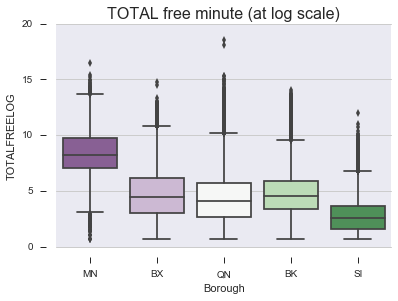

In [56]:

plt.title('TOTAL free minute (at log scale)',size = 16)
sns.set(style="ticks")

sns.boxplot(x="Borough", y="TOTALFREELOG", data=result_f, palette="PRGn")
sns.despine(offset=10, trim=True)
plt.savefig('Total_free_minute.jpg')

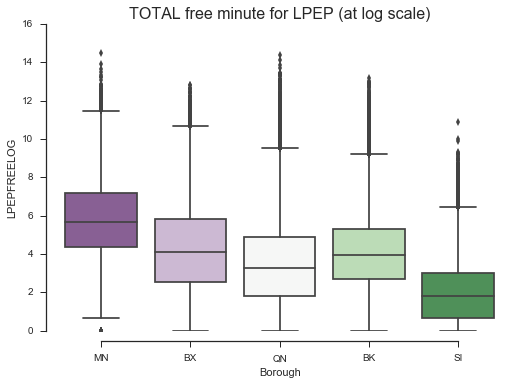

In [57]:
plt.title('TOTAL free minute for LPEP (at log scale)',size = 16)
sns.set(style="ticks")

sns.boxplot(x="Borough", y="LPEPFREELOG", data=result_f, palette="PRGn")
sns.despine(offset=10, trim=True)
plt.savefig('Total_free_minuteLPEP.jpg')

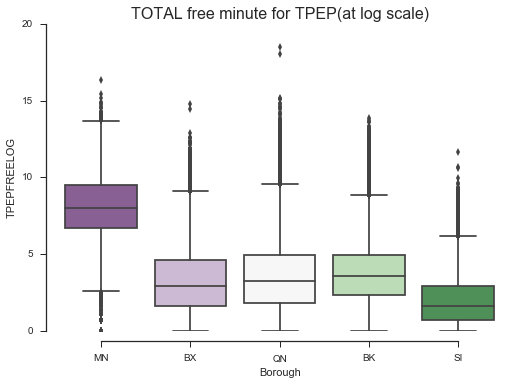

In [58]:

plt.title('TOTAL free minute for TPEP(at log scale)',size = 16)
sns.set(style="ticks")
sns.boxplot(x="Borough", y="TPEPFREELOG", data=result_f, palette="PRGn")
sns.despine(offset=10, trim=True)
plt.savefig('Total_free_minuteTPEP.jpg')

In [59]:
result_f[['BBL','geometry','TOTALFREE']].to_csv('check.csv')

In [60]:
result_f['Borough'].unique()

array(['MN', 'BX', 'QN', 'BK', 'SI'], dtype=object)

In [61]:
seg_list = ['TOTAL', 'TPEP', 'LPEP']
boro_list = result_f['Borough'].unique()
bbl_list = {x:{} for x in seg_list} 
bbl_list

{'LPEP': {}, 'TOTAL': {}, 'TPEP': {}}

In [62]:
for i in seg_list:
    temp_list = []
    attr = i + 'FREE'
    for j in boro_list:
        values = result_f[result_f['Borough']==j].sort_values(by=attr, ascending=False).reset_index()['BBL'][:5]
        for n in range(len(values)):
            temp_list.append(values[n])
    for k in range(len(temp_list)):
        bbl_list[i][k] = temp_list[k]

In [63]:
dat = pd.DataFrame.from_dict(bbl_list)

In [64]:
dat['TYPE1'] = 'LPEP'
dat['TYPE2'] = 'TPEP'
dat['TYPE3'] = 'TOTAL'

In [65]:
dat.head(2)

,LPEP,TOTAL,TPEP,TYPE1,TYPE2,TYPE3
0,1011110001,1011110001,1011110001,LPEP,TPEP,TOTAL
1,1021380040,1000160003,1000160003,LPEP,TPEP,TOTAL


In [66]:
dat1 = dat[['LPEP','TYPE1']].rename(columns={'LPEP':'BBL'})
dat2 = dat[['TPEP','TYPE2']].rename(columns={'TPEP':'BBL'})
dat3 = dat[['TOTAL','TYPE3']].rename(columns={'TOTAL':'BBL'})

In [67]:
dat1 = dat1.merge(result_f,on='BBL',how='inner')
dat1 = dat1[['BBL','geometry','TYPE1']].rename(columns={'TYPE1':'TYPE'})

In [68]:
dat2 = dat2.merge(result_f,on='BBL',how='inner')
dat2 = dat2[['BBL','geometry','TYPE2']].rename(columns={'TYPE2':'TYPE'})

In [69]:
dat3 = dat3.merge(result_f,on='BBL',how='inner')
dat3 = dat3[['BBL','geometry','TYPE3']].rename(columns={'TYPE3':'TYPE'})

In [70]:
dat25 = pd.concat([dat1,dat2,dat3])

In [71]:
dat25.to_csv('TOP25.csv')

In [72]:
totDfree = pd.read_csv('total_demand_freemins.csv',header=None,names=['BBL','FREE','DEMAND'])

In [73]:
lpepDfree = pd.read_csv('lpep_demand_freemins.csv',header=None,names=['BBL','FREE','DEMAND'])

In [74]:
tpepDfree = pd.read_csv('tpep_demand_freemins.csv',header=None,names=['BBL','FREE','DEMAND'])

In [75]:
totDfree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310257 entries, 0 to 310256
Data columns (total 3 columns):
BBL       310257 non-null int64
FREE      310257 non-null int64
DEMAND    310257 non-null int64
dtypes: int64(3)
memory usage: 7.1 MB


In [76]:
totDfree['RATIO'] = totDfree.DEMAND/totDfree.FREE

In [77]:
totDfree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310257 entries, 0 to 310256
Data columns (total 4 columns):
BBL       310257 non-null int64
FREE      310257 non-null int64
DEMAND    310257 non-null int64
RATIO     310257 non-null float64
dtypes: float64(1), int64(3)
memory usage: 9.5 MB


In [78]:
totDfree = totDfree.merge(result_f, on='BBL', how='inner')


In [79]:
totDfree.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 308236 entries, 0 to 308235
Data columns (total 12 columns):
BBL             308236 non-null int64
FREE            308236 non-null int64
DEMAND          308236 non-null int64
RATIO           308236 non-null float64
geometry        308236 non-null object
Borough         308236 non-null object
TPEPFREE        308236 non-null int64
LPEPFREE        308236 non-null int64
TOTALFREE       308236 non-null int64
TOTALFREELOG    308236 non-null float64
TPEPFREELOG     308236 non-null float64
LPEPFREELOG     308236 non-null float64
dtypes: float64(4), int64(6), object(2)
memory usage: 30.6+ MB


In [80]:
totDfree.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 308236 entries, 0 to 308235
Data columns (total 12 columns):
BBL             308236 non-null int64
FREE            308236 non-null int64
DEMAND          308236 non-null int64
RATIO           308236 non-null float64
geometry        308236 non-null object
Borough         308236 non-null object
TPEPFREE        308236 non-null int64
LPEPFREE        308236 non-null int64
TOTALFREE       308236 non-null int64
TOTALFREELOG    308236 non-null float64
TPEPFREELOG     308236 non-null float64
LPEPFREELOG     308236 non-null float64
dtypes: float64(4), int64(6), object(2)
memory usage: 30.6+ MB


In [81]:
totDfree1 = totDfree[['BBL','geometry','RATIO','Borough']]

In [82]:
# saving as PDF 
totDfree[['BBL','geometry','RATIO']].to_csv('totaldemandratio.csv')

In [83]:
totDfree.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 308236 entries, 0 to 308235
Data columns (total 12 columns):
BBL             308236 non-null int64
FREE            308236 non-null int64
DEMAND          308236 non-null int64
RATIO           308236 non-null float64
geometry        308236 non-null object
Borough         308236 non-null object
TPEPFREE        308236 non-null int64
LPEPFREE        308236 non-null int64
TOTALFREE       308236 non-null int64
TOTALFREELOG    308236 non-null float64
TPEPFREELOG     308236 non-null float64
LPEPFREELOG     308236 non-null float64
dtypes: float64(4), int64(6), object(2)
memory usage: 30.6+ MB


In [84]:
totDfree[totDfree.BBL<0]

,BBL,FREE,DEMAND,RATIO,geometry,Borough,TPEPFREE,LPEPFREE,TOTALFREE,TOTALFREELOG,TPEPFREELOG,LPEPFREELOG


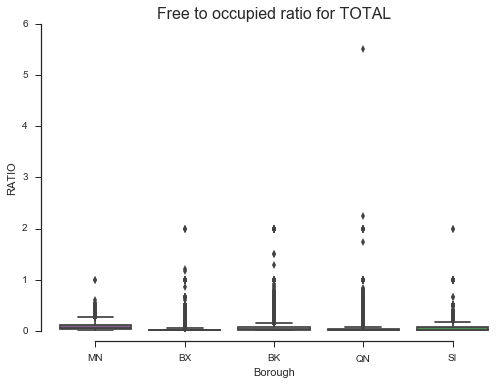

In [85]:
plt.title('Free to occupied ratio for TOTAL',size = 16)
sns.set(style="ticks")
sns.boxplot(x="Borough", y="RATIO", data=totDfree1, palette="PRGn")
sns.despine(offset=10, trim=True)
plt.savefig('Total_free_tooccupiedratio.jpg')

In [86]:
lpepDfree['RATIO'] = lpepDfree.DEMAND/lpepDfree.FREE
lpepDfree = lpepDfree.merge(result_f, on='BBL', how='inner')


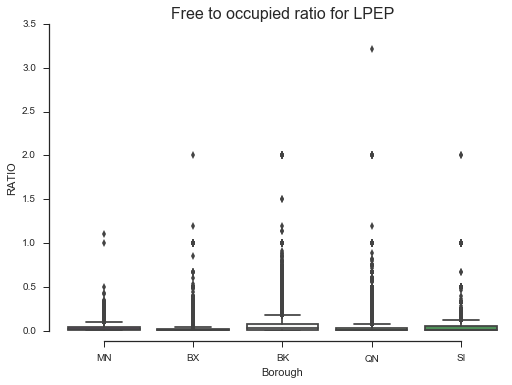

In [87]:
plt.title('Free to occupied ratio for LPEP',size = 16)
sns.set(style="ticks")

sns.boxplot(x="Borough", y="RATIO", data=lpepDfree, palette="PRGn")
sns.despine(offset=10, trim=True)
plt.savefig('LPEP_free_tooccupiedratio.jpg')

In [88]:
tpepDfree['RATIO'] = tpepDfree.DEMAND/tpepDfree.FREE
tpepDfree = tpepDfree.merge(result_f, on='BBL', how='inner')

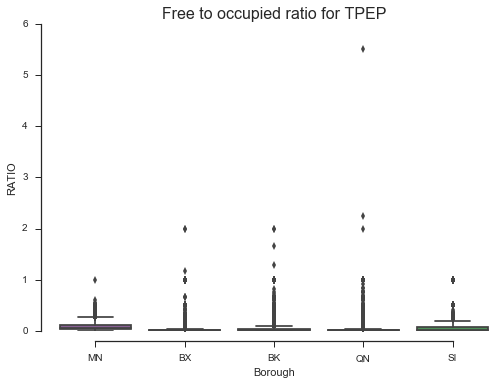

In [89]:
plt.title('Free to occupied ratio for TPEP',size = 16)
sns.set(style="ticks")

sns.boxplot(x="Borough", y="RATIO", data=tpepDfree, palette="PRGn")
sns.despine(offset=10, trim=True)
plt.savefig('TPEP_free_tooccupiedratio.jpg')

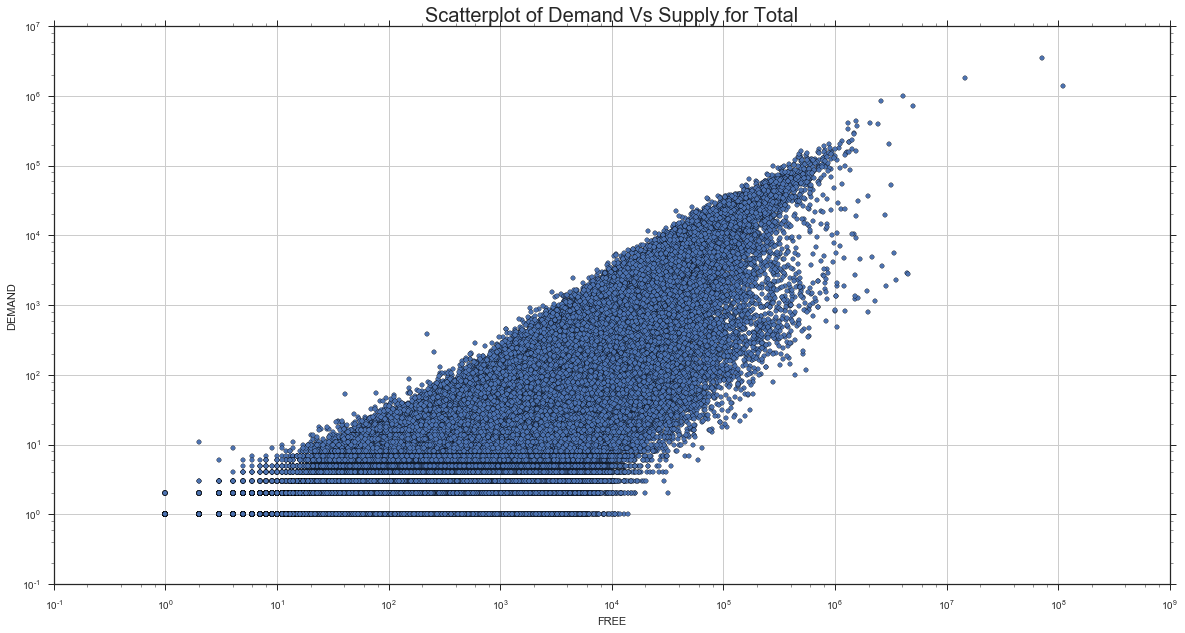

In [90]:
#plt.title('Free to occupied ratio for TPEP',size = 16)
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_title('Scatterplot of Demand Vs Supply for Total',size=20)
#ax.title('Scatterplot of Demand Vs Supply for Total',size =15)
totDfree.plot(kind='scatter',x='FREE',y='DEMAND',loglog=True,ax=ax,grid=True)
plt.savefig('Total_free_tooccupiedscatter.jpg')

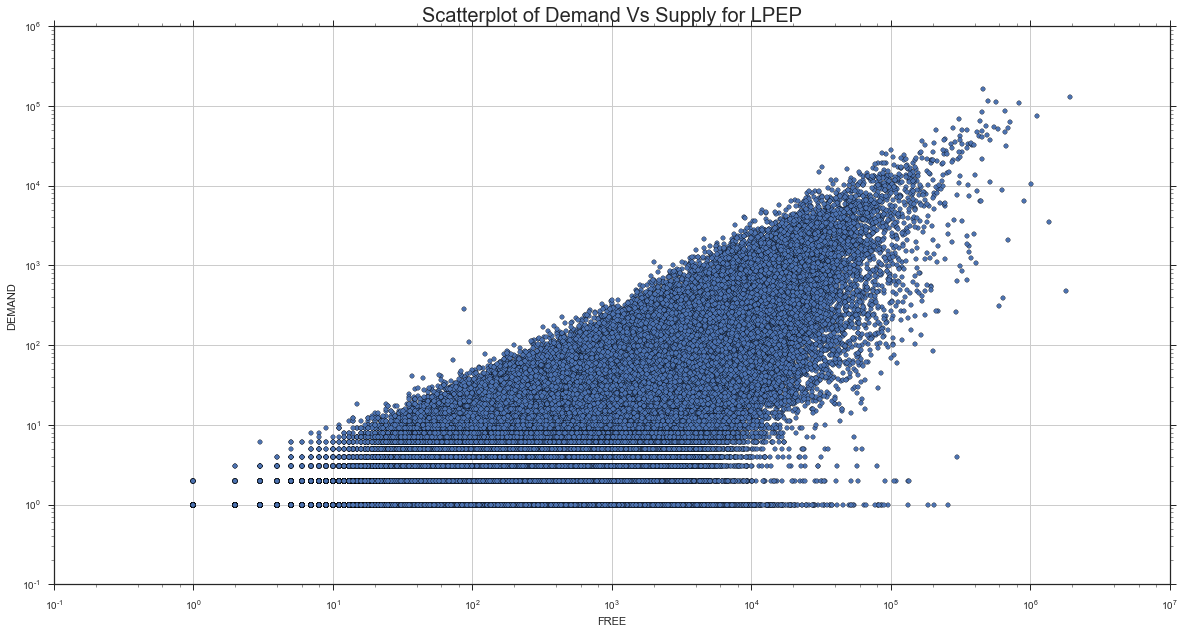

In [91]:
#plt.title('Free to occupied ratio for TPEP',size = 16)
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_title('Scatterplot of Demand Vs Supply for LPEP',size=20)
lpepDfree.plot(kind='scatter',x='FREE',y='DEMAND',loglog=True,ax=ax,grid=True)
plt.savefig('LPEPl_free_tooccupiedratio.jpg')

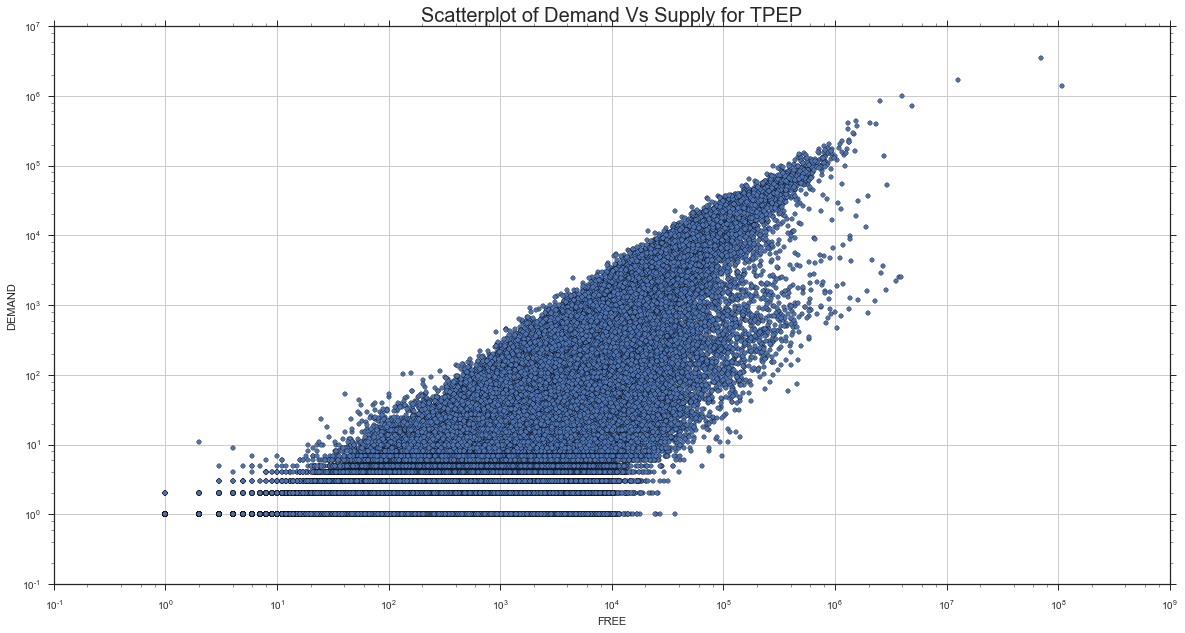

In [92]:
#plt.title('Free to occupied ratio for TPEP',size = 16)
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_title('Scatterplot of Demand Vs Supply for TPEP',size=20)
tpepDfree.plot(kind='scatter',x='FREE',y='DEMAND',loglog=True,ax=ax,grid=True)
plt.savefig('TPEP_free_tooccupiedratio.jpg')

In [ ]:
totDfree[totDfree.BBL==4053890002]

In [ ]:
totDfree[['BBL','geometry','RATIO']].to_csv('totaldemandratio.csv',index=False)

In [ ]:
data_file.head(2)

In [ ]:
totDfree1.head(1)

In [ ]:
totDfree1.describe()

# Creating buckets for analysis 

In [93]:
totDfree1.RATIO.describe()

count    308236.000000
mean          0.048894
std           0.082399
min           0.000063
25%           0.008036
50%           0.022321
75%           0.058824
max           5.500000
Name: RATIO, dtype: float64

In [94]:
np.percentile(totDfree1.RATIO,90)

0.12130603335023232

In [95]:
np.percentile(totDfree1.RATIO,95)

0.17065685761080365

In [96]:
np.percentile(totDfree1.RATIO,66)

0.041666666666666664

In [97]:
np.percentile(totDfree1.RATIO,99.)

0.33333333333333331

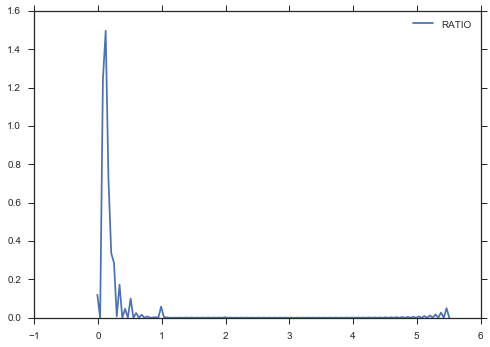

In [99]:
sns.kdeplot(totDfree1.RATIO)

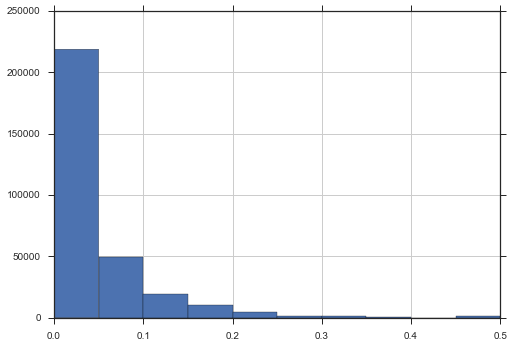

In [100]:
totDfree1[totDfree1.RATIO<=.5].RATIO.hist()

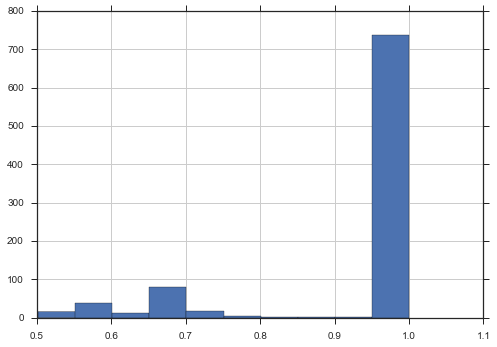

In [101]:
totDfree1[(totDfree1.RATIO>.5) & (totDfree1.RATIO<=1)].RATIO.hist()

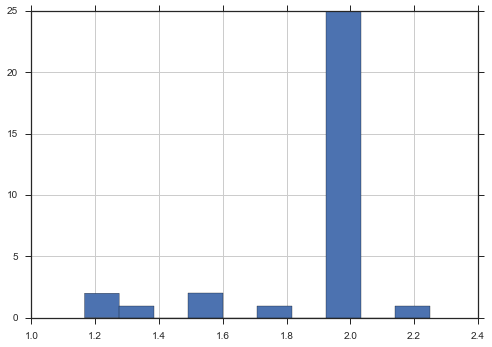

In [102]:
totDfree1[(totDfree1.RATIO>1) & (totDfree1.RATIO<=3)].RATIO.hist()

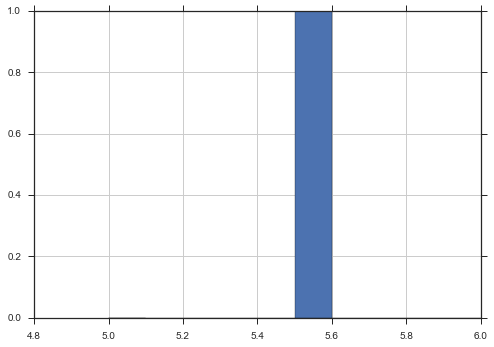

In [103]:
totDfree1[totDfree1.RATIO>3].RATIO.hist()

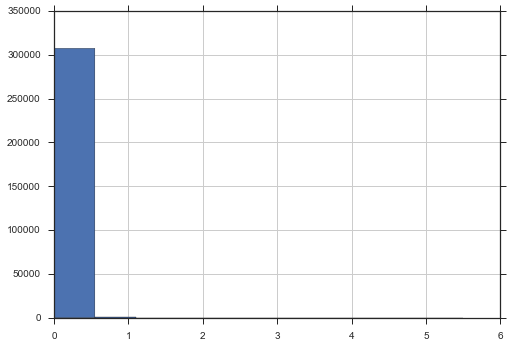

In [104]:
totDfree1.RATIO.hist()

In [105]:
totDfree1[totDfree1.RATIO>3]

,BBL,geometry,RATIO,Borough
276877,4053890002,"POLYGON ((-73.807444 40.759229, -73.807451 40....",5.5,QN


In [108]:
def bucket(a):
    if a<=1:
        return 1
    elif ((a>=1) & (a<=2)):
        return 2
    else:
        return 3
          

In [110]:
totDfree1.head(2) # = totDfree1.drop('BUCKET',axis=1)

,BBL,geometry,RATIO,Borough
0,1000010010,"POLYGON ((-74.01690600000001 40.693353, -74.01...",0.077525,MN
1,1000010201,"POLYGON ((-74.040015 40.700841, -74.0379279999...",0.128205,MN


In [111]:
totDfree1['BUCKET'] = totDfree1.RATIO.map(lambda x : bucket(x))

/Users/bhagwatsinghbisht/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [ ]:
totDfree1[['BBL','geometry','BUCKET']].to_csv('latest.csv')

In [112]:
totDfree1.loc[276877]

BBL                                                4053890002
geometry    POLYGON ((-73.807444 40.759229, -73.807451 40....
RATIO                                                     5.5
Borough                                                    QN
BUCKET                                                      3
Name: 276877, dtype: object

In [113]:
totDfree1.groupby('BUCKET')['RATIO'].describe()

BUCKET       
1       count    308203.000000
        mean          0.048685
        std           0.079581
        min           0.000063
        25%           0.008032
        50%           0.022305
        75%           0.058824
        max           1.000000
2       count        31.000000
        mean          1.883625
        std           0.257305
        min           1.166667
        25%           2.000000
        50%           2.000000
        75%           2.000000
        max           2.000000
3       count         2.000000
        mean          3.875000
        std           2.298097
        min           2.250000
        25%           3.062500
        50%           3.875000
        75%           4.687500
        max           5.500000
dtype: float64

In [ ]:
totDfree1[totDfree1.BUCKET==3].plot()

In [ ]:
from geopandas import GeoDataFrame
from shapely.geometry import point

crs = None
#geometry = [Point(xy) for xy in zip(df.Lon, df.Lat)]
geo_df = GeoDataFrame(totDfree1, crs=crs, geometry=totDfree1.geometry)

In [ ]:
type(geo_df)

In [ ]:
geo_df[geo_df.BUCKET==1].plot()